In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading datasets
per_game = pd.read_csv('NBA_players_stats_per_game.csv')
per_100_poss = pd.read_csv('NBA_players_stats_per_100_possessions.csv')
advanced = pd.read_csv('NBA_players_stats_advanced.csv')

In [3]:
# Merging 3 dataframes into one
stats = pd.concat([per_game, per_100_poss, advanced], axis=1)

In [4]:
# Droping empty columns
stats = stats.drop(['Unnamed: 24', 'Unnamed: 29', 'Unnamed: 19'], axis=1)

In [5]:
# Droping duplicated columns with same values
stats = stats.T.drop_duplicates().T

In [6]:
# Droping raws with stats of players which was traded this season (Dataframe had raws with stats in old team,
# in new team and total. We keep only total stats of these players)
stats = stats.drop_duplicates(['Rk']).reset_index()

In [7]:
#Finding indexes of raws and columns with NaN values
x = list(pd.isnull(stats).any(1).nonzero()[0])
y = list(pd.isnull(stats).any(0).nonzero()[0])
print(x, y)
xy = stats.loc[x]

[5, 17, 20, 33, 42, 45, 58, 66, 70, 76, 79, 100, 101, 102, 108, 129, 132, 143, 173, 190, 194, 203, 208, 226, 234, 258, 274, 278, 280, 330, 336, 337, 340, 341, 356, 358, 359, 386, 390, 413, 414, 417, 429, 431, 442, 460, 483] [11, 14, 17, 18, 21, 49, 52, 53, 54, 61]


In [8]:
# Replace all of the NaN values with 0
stats = stats.fillna(0)

In [9]:
#Convert columns to numeric formats
stats.apply(pd.to_numeric, errors='ignore')

index   Rk                           Player Pos  Age   Tm   G  GS    MP  \
0        0    1           Alex Abrines\abrinal01  SG   23  OKC  68   6  15.5   
1        1    2               Quincy Acy\acyqu01  PF   26  TOT  38   1  14.7   
2        4    3           Steven Adams\adamsst01   C   23  OKC  80  80  29.9   
3        5    4          Arron Afflalo\afflaar01  SG   31  SAC  61  45  25.9   
4        6    5          Alexis Ajinca\ajincal01   C   28  NOP  39  15  15.0   
5        7    6           Cole Aldrich\aldrico01   C   28  MIN  62   0   8.6   
6        8    7      LaMarcus Aldridge\aldrila01  PF   31  SAS  72  72  32.4   
7        9    8            Lavoy Allen\allenla01  PF   27  IND  61   5  14.3   
8       10    9             Tony Allen\allento01  SG   35  MEM  71  66  27.0   
9       11   10        Al-Farouq Aminu\aminual01  SF   26  POR  61  25  29.1   
10      12   11         Chris Andersen\anderch01   C   38  CLE  12   0   9.5   
11      13   12          Alan Anderson\anderal01  SF   34  LAC  30   0  10.3   
12      14   13        Justin Anderson\anderju01  SF   23  TOT  75  10  16.4   
13      17   14          Kyle Anderson\anderky01  SG   23  SAS  72  14  14.2   
14      18   15          Ryan Anderson\anderry01  PF   28  HOU  72  72  29.4   
15      19   16  Giannis Antetokounmpo\antetgi01  SF   22  MIL  80  80  35.6   
16      20   17        Carmelo Anthony\anthoca01  SF   32  NYK  74  74  34.3   
17      21   18           Joel Anthony\anthojo01   C   34  SAS  19   0   6.4   
18      22   19           Trevor Ariza\arizatr01  SF   31  HOU  80  80  34.7   
19      23   20         Darrell Arthur\arthuda01  PF   28  DEN  41   7  15.6   
20      24   21               Omer Asik\asikom01   C   30  NOP  31  19  15.5   
21      25   22          D.J. Augustin\augusdj01  PG   29  ORL  78  20  19.7   
22      26   23           Luke Babbitt\babbilu01  SF   27  MIA  68  55  15.7   
23      27   24              Ron Baker\bakerro01  SG   23  NYK  52  13  16.5   
24      28   25           Wade Baldwin\baldwwa01  PG   20  MEM  33   1  12.3   
25      29   26        Leandro Barbosa\barbole01  SG   34  PHO  67   0  14.4   
26      30   27             J.J. Barea\bareajo01  PG   32  DAL  35   6  22.0   
27      31   28        Harrison Barnes\barneha02  PF   24  DAL  79  79  35.5   
28      32   29            Matt Barnes\barnema02  SF   36  TOT  74  18  24.0   
29      35   30            Will Barton\bartowi01  SG   26  DEN  60  19  28.4   
..     ...  ...                              ...  ..  ...  ...  ..  ..   ...   
456    557  457              David West\westda01   C   36  GSW  68   0  12.6   
457    558  458      Russell Westbrook\westbru01  PG   28  OKC  81  81  34.6   
458    559  459            Okaro White\whiteok01  PF   24  MIA  35   0  13.5   
459    560  460       Isaiah Whitehead\whiteis01  PG   21  BRK  73  26  22.5   
460    561  461       Hassan Whiteside\whiteha01   C   27  MIA  77  77  32.6   
461    562  462         Andrew Wiggins\wiggian01  SF   21  MIN  82  82  37.2   
462    563  463            C.J. Wilcox\wilcocj01  SG   26  ORL  22   0   4.9   
463    564  464          Alan Williams\willial03   C   24  PHO  47   0  15.1   
464    565  465         Deron Williams\willide01  PG   32  TOT  64  44  25.9   
465    568  466       Derrick Williams\willide02  PF   25  TOT  50  11  16.1   
466    571  467           Lou Williams\willilo02  SG   30  TOT  81   1  24.6   
467    574  468        Marvin Williams\willima02  PF   30  CHO  76  76  30.2   
468    575  469        Reggie Williams\willire02  SF   30  NOP   6   0  13.2   
469    576  470          Troy Williams\willitr02  SF   22  TOT  30  16  18.6   
470    579  471           Kyle Wiltjer\wiltjky01  PF   24  HOU  14   0   3.1   
471    580  472        Justise Winslow\winslju01  SF   20  MIA  18  15  34.7   
472    581  473            Jeff Withey\witheje01   C   26  UTA  51   1   8.5   
473    582  474          Christian Wood\woodch01  PF   21  CHO  13   0   8.2   
474  

In [10]:
#Rename players to normal view
list_player = []
for i in stats.Player:
    i = i.split("\\")[0]
    list_player.append(i)
stats.Player = list_player

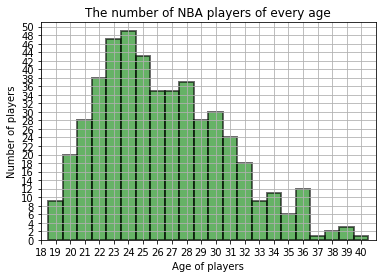

In [12]:
#Visualization of distribution NBA players of different ages
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xticks(np.arange(18,41,1))
ax.set_yticks(np.arange(0,51,2))
ax.set_xlim(18,41)
ax.set_ylim(0,51)

plt.hist(stats.Age, bins=22, range = (19, 41), align ='left', ec ='black', fc = 'g', alpha = 0.6, lw = 1.9)

plt.xlabel('Age of players')
plt.ylabel('Number of players')
plt.title('The number of NBA players of every age')
plt.grid(True)
plt.show()